In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data_cleanup/clean_data.csv")
df.columns

Index(['model_name', 'model_version', 'created_at', 'downloads', 'likes',
       'library_name', 'nb_base_model', 'nb_dataset', 'framework_torch',
       'framework_jax', 'framework_onnx', 'framework_tensorflow',
       'framework_keras', 'base_models', 'NB_Base_models', 'langs', 'NB_Lang',
       'tasks', 'NB_tasks', 'transformers', 'NB_techs',
       'ONEHOT_endpoints_compatible', 'ONEHOT_autotrain_compatible',
       'ONEHOT_safetensors', 'ONEHOT_tensorboard', 'ONEHOT_has_space', 'NB_en',
       'NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es'],
      dtype='object')

# analysis - Language
Nb of download and language


'created_at','downloads','likes','NB_Lang','NB_en','NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es'

大语言模型中语言是很重要的一部分,模型中可以使用的语言限制了使用的国家,地区和领域
我将其中常用语言的数量进行了统计,并且同时将世界上最常用的几种语言(英语,法语,中文,阿拉伯语,德语和西班牙语)进行独热编码处理

In [3]:
col_name = ['created_at','downloads','likes','NB_Lang','NB_en','NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es']
df = df[col_name]

In [4]:
df['created_time'] = pd.to_datetime(df['created_at'])

In [5]:
df

,created_at,downloads,likes,NB_Lang,NB_en,NB_fr,NB_zh,NB_ar,NB_de,NB_es,created_time
0,2022-03-02,74335,4,1,1,0,0,0,0,0,2022-03-02
1,2022-03-02,2855580,75,1,1,0,0,0,0,0,2022-03-02
2,2022-03-02,1491,0,1,1,0,0,0,0,0,2022-03-02
3,2022-03-02,6875,12,1,1,0,0,0,0,0,2022-03-02
4,2022-03-02,1449,1,1,1,0,0,0,0,0,2022-03-02
...,...,...,...,...,...,...,...,...,...,...,...
44706,2024-01-24,11,0,0,0,0,0,0,0,0,2024-01-24
44707,2024-01-24,18,0,0,0,0,0,0,0,0,2024-01-24
44708,2024-01-24,18,1,0,0,0,0,0,0,0,2024-01-24
44709,2024-01-24,25,0,0,0,0,0,0,0,0,2024-01-24


In [6]:
df.describe()

,downloads,likes,NB_Lang,NB_en,NB_fr,NB_zh,NB_ar,NB_de,NB_es
count,4.471100e+04,44711.000000,44711.000000,44711.000000,44711.000000,44711.000000,44711.000000,44711.000000,44711.000000
mean,1.959379e+04,9.289817,0.898437,0.180336,0.021091,0.027063,0.013084,0.020957,0.019771
std,6.513970e+05,92.678416,6.392881,0.384471,0.143689,0.162268,0.113636,0.143241,0.139215
min,1.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.920000e+02,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.699039e+07,10055.000000,124.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
lang_cols = ['NB_Lang','NB_en','NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es']
lang_nb = []
for lang in lang_cols:
    lang_nb.append(df[lang].sum())
    print(f'download of {lang}: {df[lang].sum()}')

download of NB_Lang: 40170
download of NB_en: 8063
download of NB_fr: 943
download of NB_zh: 1210
download of NB_ar: 585
download of NB_de: 937
download of NB_es: 884


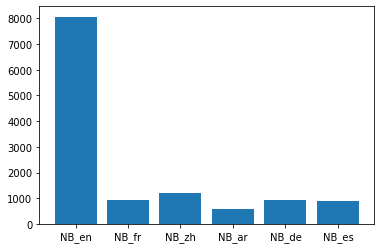

In [19]:
plt.bar(lang_cols[1:],lang_nb[1:])
plt.show()

In [26]:
df.columns

Index(['created_at', 'downloads', 'likes', 'NB_Lang', 'NB_en', 'NB_fr',
       'NB_zh', 'NB_ar', 'NB_de', 'NB_es', 'created_time'],
      dtype='object')

In [27]:
df[df['NB_en'] == 1]['downloads'].sum()

501999302

In [31]:
nb_download = []
for lang in lang_cols:
    nb_download.append(df[df[lang] == 1]['downloads'].sum())
#     print(f'download of {lang}: {df[df[lang] == 1]['downloads'].sum()}')

In [32]:
for i in range(len(lang_cols)):
    print(f"{lang_cols[i]} : {nb_download[i]}")

NB_Lang : 534698857
NB_en : 501999302
NB_fr : 70005108
NB_zh : 56351087
NB_ar : 49455920
NB_de : 62189926
NB_es : 122335670


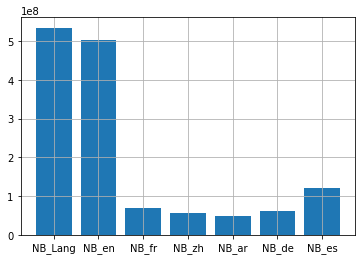

In [34]:
plt.bar(lang_cols,nb_download)
plt.grid()
plt.show()

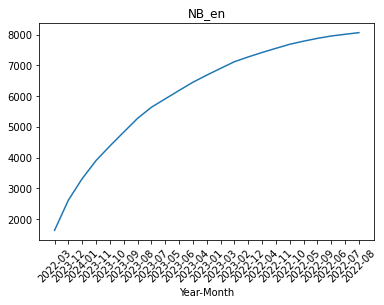

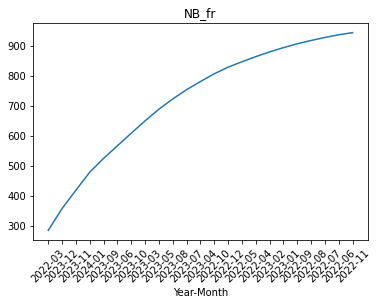

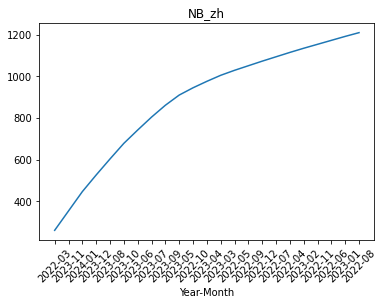

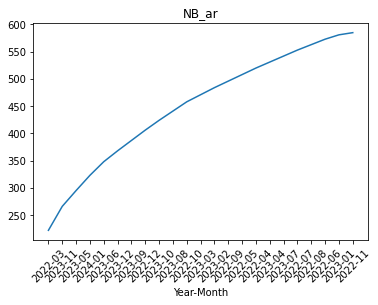

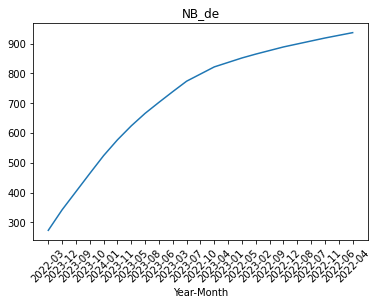

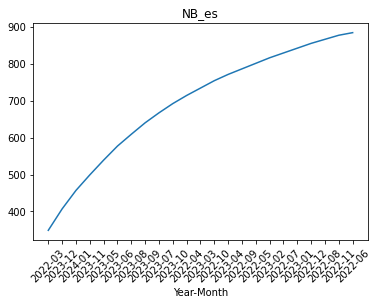

In [84]:
for lang in lang_cols[1:]:
    model_month = df[df[lang] == 1]['YM'].value_counts()
    modelss = model_month.cumsum()

    x_value = [str(p) for p in modelss.index]

    plt.plot(x_value,modelss.values.tolist())
    plt.title(lang)
    plt.xlabel('Year-Month')
    plt.xticks(rotation = 45)
    plt.show()

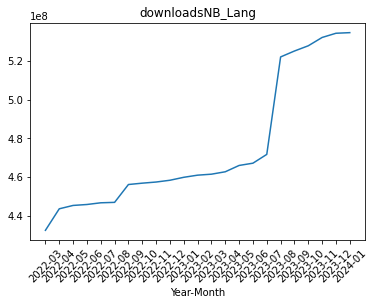

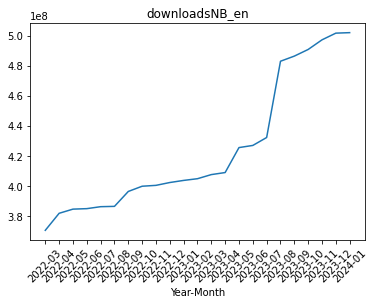

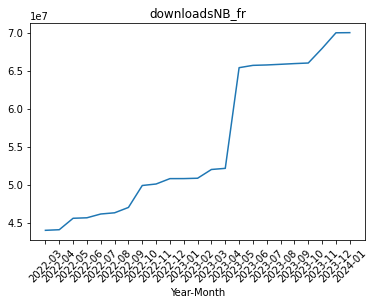

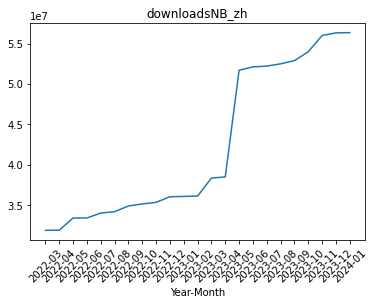

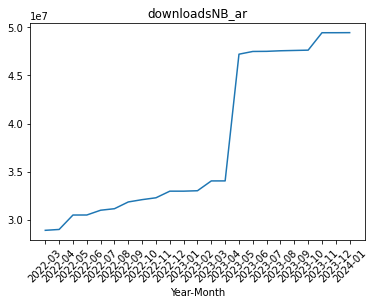

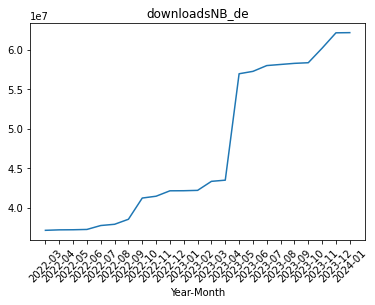

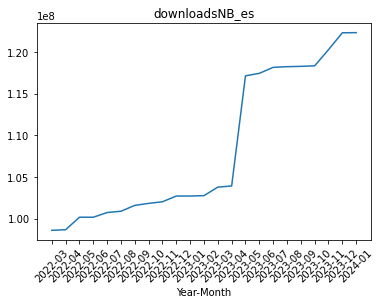

In [97]:
df['YM'] = df['created_time'].dt.to_period('M')
month_data = df.groupby('YM').agg(
    {'downloads':'sum','YM':'count'}
)
for lang in lang_cols:
    model_downloads = df[df[lang] == 1].groupby('YM')['downloads'].sum()  # 统计NB_en为1的downloads数量
    modelss = model_downloads.cumsum()

    x_value = [str(p) for p in modelss.index]

    plt.plot(x_value,modelss.values.tolist())
    plt.title('downloads' + lang)
    plt.xlabel('Year-Month')
    plt.xticks(rotation = 45)
    plt.show()

In [98]:
df

,created_at,downloads,likes,NB_Lang,NB_en,NB_fr,NB_zh,NB_ar,NB_de,NB_es,created_time,YM
0,2022-03-02,74335,4,1,1,0,0,0,0,0,2022-03-02,2022-03
1,2022-03-02,2855580,75,1,1,0,0,0,0,0,2022-03-02,2022-03
2,2022-03-02,1491,0,1,1,0,0,0,0,0,2022-03-02,2022-03
3,2022-03-02,6875,12,1,1,0,0,0,0,0,2022-03-02,2022-03
4,2022-03-02,1449,1,1,1,0,0,0,0,0,2022-03-02,2022-03
...,...,...,...,...,...,...,...,...,...,...,...,...
44706,2024-01-24,11,0,0,0,0,0,0,0,0,2024-01-24,2024-01
44707,2024-01-24,18,0,0,0,0,0,0,0,0,2024-01-24,2024-01
44708,2024-01-24,18,1,0,0,0,0,0,0,0,2024-01-24,2024-01
44709,2024-01-24,25,0,0,0,0,0,0,0,0,2024-01-24,2024-01


In [ ]:
# corr ? 